***

# [LangChain - Tools](https://python.langchain.com/docs/integrations/tools/)

***

## Tool Calling or Function Calling
- LLM Automatically calls the function based on the query
- Function parameters are automatically passed to the function
- It is one of the essential requirements of the Agent
- Not all LLM supports tool calling.

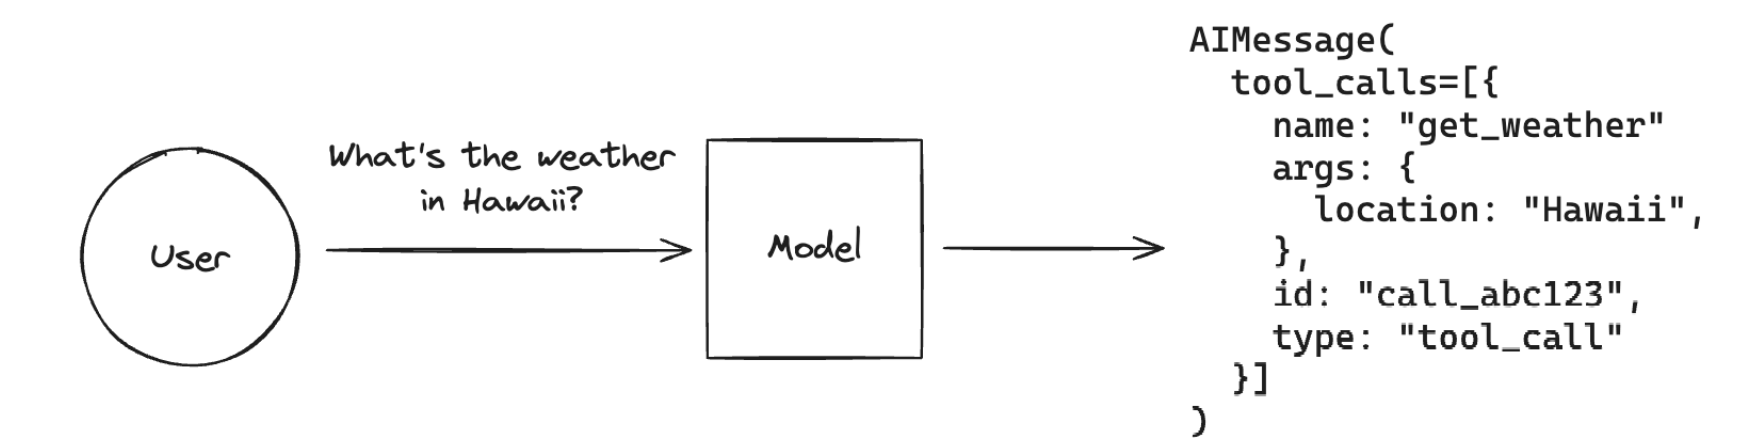

- Chat models that support tool calling features implement a .bind_tools() method for passing tool schemas to the model.

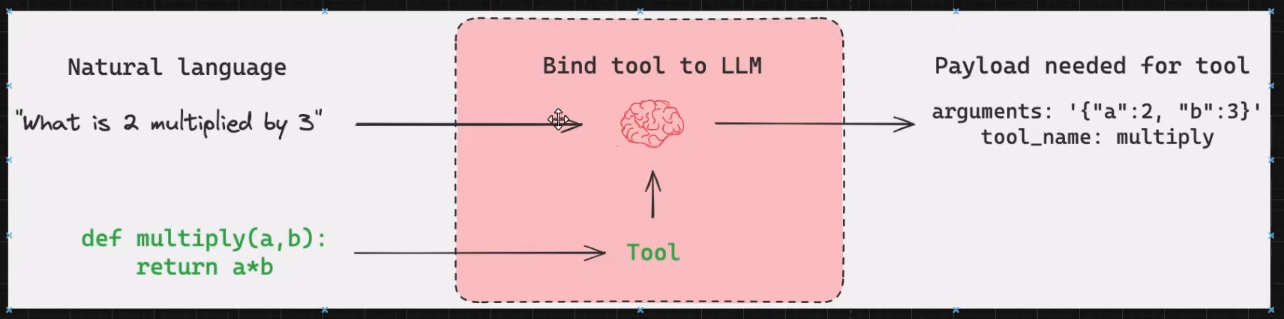

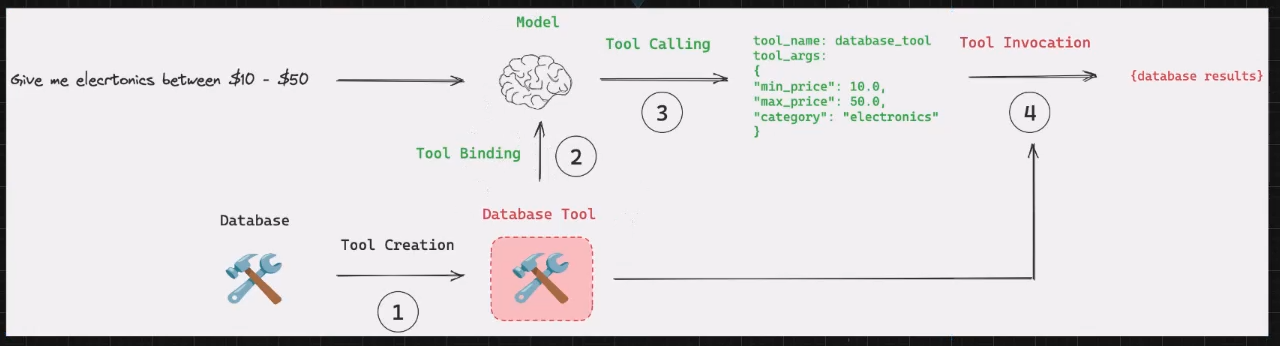

***

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate

In [32]:
base_url = "http://localhost:11434"
model = "llama3.2"

llm = ChatOllama(
    base_url=base_url,
    model=model
)

In [4]:
llm.invoke(input='hi')

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:01:07.7623929Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 4151117700, 'load_duration': 3371868800, 'prompt_eval_count': 26, 'prompt_eval_duration': 619000000, 'eval_count': 8, 'eval_duration': 140000000}, id='run-0db9f983-3b6c-43e8-9d53-061e9efb7688-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

### Custom Tools

In [5]:
from langchain_core.tools import tool

In [6]:
@tool
def add(a: int | float, b: int | float) -> int | float:
    """
    Adds two numbers together.

    Args:
        a (int or float): The first number to add.
        b (int or float): The second number to add.

    Returns:
        int or float: The sum of a and b.

    Examples:
        >>> add(2, 3)
        5
        >>> add(2.5, 3.7)
        6.2
    """
    return a + b

@tool
def multiply(a: int | float, b: int | float) -> int | float:
    """
    Multiplies two numbers together.

    Args:
        a (int or float): The first number to multiply.
        b (int or float): The second number to multiply.

    Returns:
        int or float: The product of a and b.

    Examples:
        >>> multiply(2, 3)
        6
        >>> multiply(2.5, 3.7)
        9.275
    """
    return a * b

In [7]:
add

StructuredTool(name='add', description='Adds two numbers together.\n\nArgs:\n    a (int or float): The first number to add.\n    b (int or float): The second number to add.\n\nReturns:\n    int or float: The sum of a and b.\n\nExamples:\n    >>> add(2, 3)\n    5\n    >>> add(2.5, 3.7)\n    6.2', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000268BB548280>)

In [8]:
add.name

'add'

In [9]:
add.description

'Adds two numbers together.\n\nArgs:\n    a (int or float): The first number to add.\n    b (int or float): The second number to add.\n\nReturns:\n    int or float: The sum of a and b.\n\nExamples:\n    >>> add(2, 3)\n    5\n    >>> add(2.5, 3.7)\n    6.2'

In [10]:
add.args

{'a': {'anyOf': [{'type': 'integer'}, {'type': 'number'}], 'title': 'A'},
 'b': {'anyOf': [{'type': 'integer'}, {'type': 'number'}], 'title': 'B'}}

In [11]:
add.args_schema.schema()

{'description': 'Adds two numbers together.\n\nArgs:\n    a (int or float): The first number to add.\n    b (int or float): The second number to add.\n\nReturns:\n    int or float: The sum of a and b.\n\nExamples:\n    >>> add(2, 3)\n    5\n    >>> add(2.5, 3.7)\n    6.2',
 'properties': {'a': {'anyOf': [{'type': 'integer'}, {'type': 'number'}],
   'title': 'A'},
  'b': {'anyOf': [{'type': 'integer'}, {'type': 'number'}], 'title': 'B'}},
 'required': ['a', 'b'],
 'title': 'add',
 'type': 'object'}

In [12]:
add.invoke({'a':10, 'b': 100})

110

In [13]:
multiply.invoke({'a':10, 'b': 4})

40

In [14]:
tools = [add, multiply]

llm_with_tools = llm.bind_tools(tools)

In [15]:
question = "What is 10 plus 190"
output = llm_with_tools.invoke(question)

output

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:01:38.7051551Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'add', 'arguments': {'a': '10', 'b': '190'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 918079100, 'load_duration': 54773900, 'prompt_eval_count': 424, 'prompt_eval_duration': 325000000, 'eval_count': 22, 'eval_duration': 532000000}, id='run-87cff722-b563-4e2d-8598-7cf3f06d3d79-0', tool_calls=[{'name': 'add', 'args': {'a': '10', 'b': '190'}, 'id': 'c726ec1a-2acb-46bc-ab8d-9879c4267d7c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 424, 'output_tokens': 22, 'total_tokens': 446})

In [16]:
output.tool_calls

[{'name': 'add',
  'args': {'a': '10', 'b': '190'},
  'id': 'c726ec1a-2acb-46bc-ab8d-9879c4267d7c',
  'type': 'tool_call'}]

In [17]:
question = "What is 10 multiply 190"
output = llm_with_tools.invoke(question)

output.tool_calls

[{'name': 'multiply',
  'args': {'a': '10', 'b': '190'},
  'id': 'f3405541-76f9-47f9-8039-b236c6338f77',
  'type': 'tool_call'}]

In [18]:
question  = "what is 1 multiplied by 2, also what is 11 plus 22?"
llm_with_tools.invoke(question).tool_calls

[{'name': 'multiply',
  'args': {'a': '1', 'b': '2'},
  'id': 'd4521174-2058-4190-a2c8-73a669f23479',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': '11', 'b': '22'},
  'id': 'b140efa1-143e-49d2-8955-cf5d5bf88095',
  'type': 'tool_call'}]

## Calling In-Built Tool 

In [19]:
# !pip install -qU duckduckgo-search wikipedia xmltodict tavily-python


### DuckDuckGo Search
- There are so many other paid options are also available like Tavily, Google, Bing, etc.

In [20]:
from langchain_community.tools import DuckDuckGoSearchRun

In [33]:
search = DuckDuckGoSearchRun()

search.invoke(input="What is todays stock market news ?")

"Beneficiaries of the incoming administration's looser regulation and business-friendly stance put forth strong showings this week. Stocks gained while Bitcoin crushed doubters and the dollar ... The stock pared gains after surging more than 4% in early trading. By 10:10 a.m. ET, shares were trading down more than 1.5%. Nvidia beat on profit in its latest quarter but projected slowing ... Find the latest stock market news from every corner of the globe at Reuters.com, your online source for breaking international market and finance news The Associated Press is an independent global news organization dedicated to factual reporting. Founded in 1846, AP today remains the most trusted source of fast, accurate, unbiased news in all formats and the essential provider of the technology and services vital to the news business. ... Stock market today: Wall Street gains ground as it ... Stock Market News And Analysis. The analysis you'll find in the Stock Market Today is based on over 130 years 

### Tavily Search

In [21]:
from langchain_community.tools import TavilySearchResults

search = TavilySearchResults(
    max_results=5,
    search_depth="advanced",
    include_answer=True,
    include_raw_content=True,
)

In [35]:
search.invoke("what is today's stock market news?")

[{'url': 'https://www.investors.com/news/stock-market-today-stock-market-news/',
  'content': "Today: Stock Market News And Analysis\nLATEST MARKET UPDATES\nCurrent Recommended Market Exposure Level\nSTOCK MARKET TODAY\nWith regular updates throughout each trading session, the Stock Market Today column highlights the latest stock market news and alerts you to any changes in market trend. By tracking the market in terms of three stages\xa0—\xa0market in uptrend, uptrend under pressure and market correction — the Stock Market Today helps you stay on top of the latest stock market news while keeping any latest fluctuations in perspective to help you decide what action, if any, to take.\n Start With This 3-Step Routine\nSee Which Stocks Were Just Added To – And Removed From – IBD Stock Lists\nHow To Buy Stocks\xa0|\xa0Buying Checklist\nWhen To Sell Stocks\xa0|\xa0Selling Checklist\nIBD Newsletters\nIBD Newsletters\nGet these newsletters delivered to your inbox & more info about our product

### Wikipedia Search

In [22]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [23]:
wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())

In [38]:
print(wikipedia.invoke(input="What is AI Agents ?"))

Page: Intelligent agent
Summary: In intelligence and artificial intelligence, an intelligent agent (IA) is an agent that perceives its environment, takes actions autonomously in order to achieve goals, and may improve its performance with learning or acquiring knowledge. 
An intelligent agent may be simple or complex: A thermostat or other control system is considered an example of an intelligent agent, as is a human being, as is any system that meets the definition, such as a firm, a state, or a biome.

Leading AI textbooks define "artificial intelligence" as the "study and design of intelligent agents", a definition that considers goal-directed behavior to be the essence of intelligence. Goal-directed agents are also described using a term borrowed from economics, "rational agent".
An agent has an "objective function" that encapsulates all the IA's goals. Such an agent is designed to create and execute whatever plan will, upon completion, maximize the expected value of the objective 

### PubMed

- PubMed® comprises more than 35 million citations for biomedical literature from MEDLINE, life science journals, and online books. Citations may include links to full text content from PubMed Central and publisher web sites.`m

In [24]:
from langchain_community.tools.pubmed.tool import PubmedQueryRun

In [44]:
search = PubmedQueryRun()

print(search.invoke("What is the latest research on COVID-19?"))

No good PubMed Result was found


### Tool Calling with LLM

In [25]:
@tool
def wikipedia_search(query: str) -> str:
    """
    Searches Wikipedia for general information based on the provided query.

    Args:
        query (str): The search query string.

    Returns:
        str: The response containing the relevant information from Wikipedia.

    Raises:
        Exception: If the query fails to fetch results from Wikipedia.
    """
    wikipedia = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper())
    response = wikipedia.invoke(query)
    return response


@tool
def pubmed_search(query: str) -> str:
    """
    Searches PubMed for medical and life sciences information based on the provided query.

    Args:
        query (str): The search query string.

    Returns:
        str: The response containing the relevant information from PubMed.

    Raises:
        Exception: If the query fails to fetch results from PubMed.
    """
    search = PubmedQueryRun()
    response = search.invoke(query)
    return response


@tool
def tavily_search(query: str) -> str:
    """
    Performs a real-time web search for the latest information, such as news, stock market updates, weather, and more.

    Args:
        query (str): The search query string.

    Returns:
        str: The response containing relevant information from the web search.

    Raises:
        Exception: If the query fails to fetch results from the web search tool.
    """
    search = TavilySearchResults(
        max_results=5,
        search_depth="advanced",
        include_answer=True,
        include_raw_content=True,
    )
    response = search.invoke(query)
    return response

@tool
def add(a: int | float, b: int | float) -> int | float:
    """
    Adds two numbers together.

    Args:
        a (int or float): The first number to add.
        b (int or float): The second number to add.

    Returns:
        int or float: The sum of a and b.

    Examples:
        >>> add(2, 3)
        5
        >>> add(2.5, 3.7)
        6.2
    """
    return a + b

@tool
def multiply(a: int | float, b: int | float) -> int | float:
    """
    Multiplies two numbers together.

    Args:
        a (int or float): The first number to multiply.
        b (int or float): The second number to multiply.

    Returns:
        int or float: The product of a and b.

    Examples:
        >>> multiply(2, 3)
        6
        >>> multiply(2.5, 3.7)
        9.275
    """
    return a * b

In [53]:
tools = [ multiply, add, pubmed_search, wikipedia_search, tavily_search,]

In [54]:
list_of_tools = { tool.name: tool for tool in tools }
list_of_tools

{'multiply': StructuredTool(name='multiply', description='Multiplies two numbers together.\n\nArgs:\n    a (int or float): The first number to multiply.\n    b (int or float): The second number to multiply.\n\nReturns:\n    int or float: The product of a and b.\n\nExamples:\n    >>> multiply(2, 3)\n    6\n    >>> multiply(2.5, 3.7)\n    9.275', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000268BD2688B0>),
 'add': StructuredTool(name='add', description='Adds two numbers together.\n\nArgs:\n    a (int or float): The first number to add.\n    b (int or float): The second number to add.\n\nReturns:\n    int or float: The sum of a and b.\n\nExamples:\n    >>> add(2, 3)\n    5\n    >>> add(2.5, 3.7)\n    6.2', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000268BD25BF40>),
 'pubmed_search': StructuredTool(name='pubmed_search', description='Searches PubMed for medical and life sciences information based on t

In [35]:
llm_with_tools = llm.bind_tools(tools)

In [36]:
query = "What is the latest news"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'tavily_search', 'args': {'query': 'latest news'}, 'id': '9ce76563-bb32-43a3-98e1-32d915120058', 'type': 'tool_call'}]


In [37]:
query = "What is today's stock market news?"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'tavily_search', 'args': {'query': 'today'}, 'id': 'd34830c9-c07f-4d06-bdc0-881075f0de0c', 'type': 'tool_call'}]


In [38]:
query = "What is LLM?"
# query = "How to treat lung cancer?"
# query  = "what is 2 * 3?"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'wikipedia_search', 'args': {'query': 'LLM'}, 'id': '31682659-a342-4645-88c4-9ae2545dd807', 'type': 'tool_call'}]


In [39]:
query = "How to treat lung cancer?"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'wikipedia_search', 'args': {'query': 'treating lung cancer'}, 'id': '18c0f322-d419-4c98-9135-e6ae4a49aa6c', 'type': 'tool_call'}]


In [40]:
query  = "what is 2 * 3?"
response = llm_with_tools.invoke(query)
print(response.tool_calls)

[{'name': 'multiply', 'args': {'a': '2', 'b': '3'}, 'id': '270c1a50-c05a-43c6-bfac-7ff7cec3ea88', 'type': 'tool_call'}]


## Generate Final Result with Tool Calling

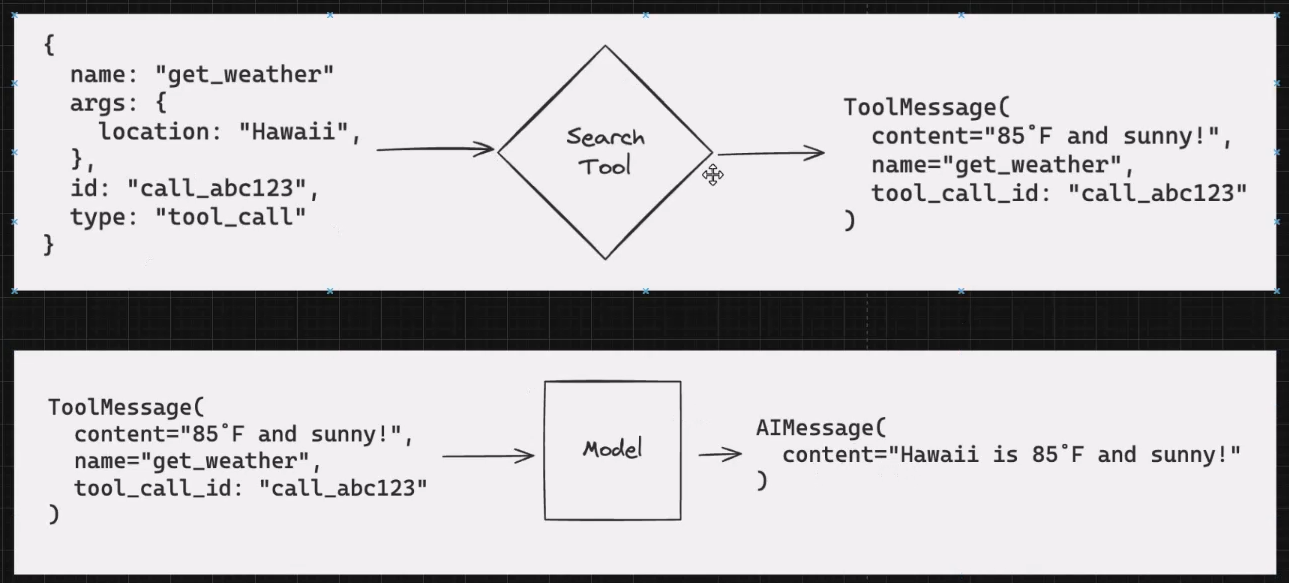

In [29]:
from langchain_core.messages import HumanMessage, AIMessage

In [45]:
# query = "What is the latest news"
# query = "What is today's stock market news?"
# query = "What is LLM?"
query = "How to treat lung cancer?"
# query  = "what is 2 * 3?"


message = [HumanMessage(content=query)]

tool_calls = llm_with_tools.invoke(input=message)
tool_calls

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:27:54.2144171Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'pubmed_search', 'arguments': {'query': 'lung cancer treatment'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 743379700, 'load_duration': 56613000, 'prompt_eval_count': 744, 'prompt_eval_duration': 52000000, 'eval_count': 20, 'eval_duration': 629000000}, id='run-58433d92-67b1-4e7a-939b-975f2da5af67-0', tool_calls=[{'name': 'pubmed_search', 'args': {'query': 'lung cancer treatment'}, 'id': 'df2d1e57-0302-42dc-b614-fefba7d88dec', 'type': 'tool_call'}], usage_metadata={'input_tokens': 744, 'output_tokens': 20, 'total_tokens': 764})

In [46]:
message.append(tool_calls)

In [47]:
message

[HumanMessage(content='How to treat lung cancer?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:27:54.2144171Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'pubmed_search', 'arguments': {'query': 'lung cancer treatment'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 743379700, 'load_duration': 56613000, 'prompt_eval_count': 744, 'prompt_eval_duration': 52000000, 'eval_count': 20, 'eval_duration': 629000000}, id='run-58433d92-67b1-4e7a-939b-975f2da5af67-0', tool_calls=[{'name': 'pubmed_search', 'args': {'query': 'lung cancer treatment'}, 'id': 'df2d1e57-0302-42dc-b614-fefba7d88dec', 'type': 'tool_call'}], usage_metadata={'input_tokens': 744, 'output_tokens': 20, 'total_tokens': 764})]

In [48]:
query = "What is medicine for lung cancer?"

message = [HumanMessage(content=query)]

ai_msg = llm_with_tools.invoke(input=message)

message.append(ai_msg)

In [55]:
message

[HumanMessage(content='What is medicine for lung cancer?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:28:42.8193481Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'pubmed_search', 'arguments': {'query': 'medicine for lung cancer'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 704180100, 'load_duration': 53307500, 'prompt_eval_count': 745, 'prompt_eval_duration': 54000000, 'eval_count': 21, 'eval_duration': 594000000}, id='run-6a17a4a2-a440-472f-b9c4-4ab88f5de551-0', tool_calls=[{'name': 'pubmed_search', 'args': {'query': 'medicine for lung cancer'}, 'id': '78f1a146-939c-4554-b61b-ef60a8ea1ec1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 745, 'output_tokens': 21, 'total_tokens': 766})]

In [50]:
ai_msg.tool_calls

[{'name': 'pubmed_search',
  'args': {'query': 'medicine for lung cancer'},
  'id': '78f1a146-939c-4554-b61b-ef60a8ea1ec1',
  'type': 'tool_call'}]

In [57]:
for tool_call in ai_msg.tool_calls:
    print(tool_call)

    tool_name = tool_call['name'].lower()

    selected_tool = list_of_tools[tool_name]

    tool_msg = selected_tool.invoke(tool_call)

    message.append(tool_msg)

{'name': 'pubmed_search', 'args': {'query': 'medicine for lung cancer'}, 'id': '78f1a146-939c-4554-b61b-ef60a8ea1ec1', 'type': 'tool_call'}


In [58]:
message

[HumanMessage(content='What is medicine for lung cancer?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-11-25T06:28:42.8193481Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'pubmed_search', 'arguments': {'query': 'medicine for lung cancer'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 704180100, 'load_duration': 53307500, 'prompt_eval_count': 745, 'prompt_eval_duration': 54000000, 'eval_count': 21, 'eval_duration': 594000000}, id='run-6a17a4a2-a440-472f-b9c4-4ab88f5de551-0', tool_calls=[{'name': 'pubmed_search', 'args': {'query': 'medicine for lung cancer'}, 'id': '78f1a146-939c-4554-b61b-ef60a8ea1ec1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 745, 'output_tokens': 21, 'total_tokens': 766}),
 ToolMessage(content='Published: 2024-11-23\nTitle: Corrigendum to "SERPINE2/PN-1 regulates the DNA damage response and rad

In [59]:
response = llm_with_tools.invoke(message)
print(response)

content="Based on the search results, here is the answer to the original user question:\n\n**Medicine for Lung Cancer**\n\nLung cancer treatment often involves a combination of therapies, including surgery, chemotherapy, radiation therapy, and targeted therapy. The specific medication used will depend on the type and stage of lung cancer, as well as the patient's overall health.\n\nSome common medications used to treat lung cancer include:\n\n* Chemotherapy: Chemotherapy uses drugs to kill cancer cells. Common chemotherapies for lung cancer include cisplatin, carboplatin, etoposide, and paclitaxel.\n* Targeted therapy: Targeted therapy uses medications that specifically target cancer cells, reducing harm to healthy cells. Examples of targeted therapies for lung cancer include erlotinib, gefitinib, and crizotinib.\n* Immunotherapy: Immunotherapy uses medications that stimulate the immune system to attack cancer cells. Examples of immunotherapies for lung cancer include nivolumab, pembro

In [63]:
print(response.content)

Based on the search results, here is the answer to the original user question:

**Medicine for Lung Cancer**

Lung cancer treatment often involves a combination of therapies, including surgery, chemotherapy, radiation therapy, and targeted therapy. The specific medication used will depend on the type and stage of lung cancer, as well as the patient's overall health.

Some common medications used to treat lung cancer include:

* Chemotherapy: Chemotherapy uses drugs to kill cancer cells. Common chemotherapies for lung cancer include cisplatin, carboplatin, etoposide, and paclitaxel.
* Targeted therapy: Targeted therapy uses medications that specifically target cancer cells, reducing harm to healthy cells. Examples of targeted therapies for lung cancer include erlotinib, gefitinib, and crizotinib.
* Immunotherapy: Immunotherapy uses medications that stimulate the immune system to attack cancer cells. Examples of immunotherapies for lung cancer include nivolumab, pembrolizumab, and atezol

In [70]:
query = "What is 20 multiply by 20. And What is 600 plus 400"

message = [HumanMessage(content=query)]

ai_msg = llm_with_tools.invoke(input=message)

# ai_msg.tool_calls

message.append(ai_msg)

for tool_call in ai_msg.tool_calls:
    print(tool_call)

    tool_name = tool_call['name'].lower()

    selected_tool = list_of_tools[tool_name]

    tool_msg = selected_tool.invoke(tool_call)

    message.append(tool_msg)

response = llm_with_tools.invoke(message)
print(response.content)

{'name': 'multiply', 'args': {'a': '20', 'b': '20'}, 'id': '661078ea-5953-4e93-aa1b-7d84ae0a71e7', 'type': 'tool_call'}
{'name': 'add', 'args': {'a': '600', 'b': '400'}, 'id': 'cc39f2de-d862-442b-82ae-68a4b626c61c', 'type': 'tool_call'}
The result of 20 multiplied by 20 is 400.

The result of 600 plus 400 is 1000.
